# Image classification with fashion_mnist dataset

In [141]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data and splitting 

In [142]:
# Loading the Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [143]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 784) (60000,)
Test data shape: (10000, 784) (10000,)


In [145]:
# Defining class names for labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [146]:
pd.DataFrame(class_names)

,0
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [174]:
x_train_flat = x_train.reshape(-1,784)
x_test_flat = x_test.reshape(-1,784)

df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train
df_train['label_name'] = df_train['label'].apply(lambda x: class_names[x])  # Map label to name

df_test = pd.DataFrame(x_test_flat)
df_train

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,label_name
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,T-shirt/top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5,Sandal
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,Trouser
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3,Dress
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0,T-shirt/top


In [175]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


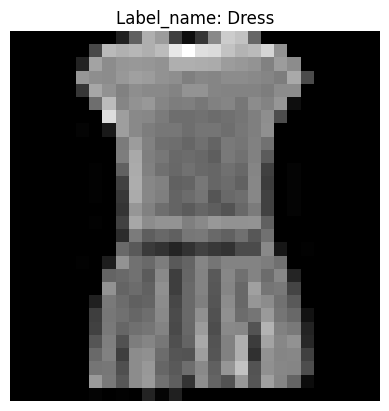

In [165]:
# Select an image index
index = 3

# Reshape the image to 28x28 before displaying
plt.imshow(x_train[index].reshape(28, 28), cmap="gray")
# Display the first image
plt.title(f"Label_name: {class_names[y_train[index]]}") 
plt.axis("off")

plt.show()

### Creating the model

In [166]:
# Define the model 
def MyLayers():
    model = keras.Sequential([
    layers.Dense(128, activation="relu", name="layer1", input_shape=(784,)), 
    layers.Dense(64, activation="relu", name="layer2"),
    layers.Dense(10, activation="softmax", name="layer3"),  # MNIST has 10 classes
    ], name="MyLayers")

    return model

In [167]:
# Compile the model
def compiling():
    model = MyLayers()
    model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    return model

In [168]:
model = compiling()

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

C:\Users\kaitale\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.7062 - sparse_categorical_accuracy: 0.7534 - val_loss: 0.4096 - val_sparse_categorical_accuracy: 0.8525
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3998 - sparse_categorical_accuracy: 0.8548 - val_loss: 0.3671 - val_sparse_categorical_accuracy: 0.8699
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.8699 - val_loss: 0.3613 - val_sparse_categorical_accuracy: 0.8749
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3239 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.3344 - val_sparse_categorical_accuracy: 0.8842
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.8872 - val_loss: 0.3437 - val_sparse_categorical_accuracy: 0.8819
313/313 - 1s - 3ms/step - loss: 0.3664 - sparse_categorical_accuracy: 0.8717
Test loss: 0.3663918077945709
Test accuracy: 0.8716999888420105


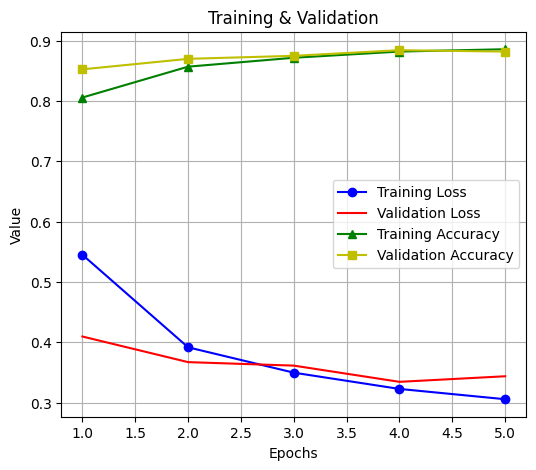

In [169]:
# Visualizing the loss and Accuracy the loss

epoch = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(6,5))
# plt.subplots(1,2)
plt.plot(epoch, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epoch, history.history['val_loss'], '-r', label='Validation Loss')
plt.plot(epoch, history.history['sparse_categorical_accuracy'], 'g^-', label='Training Accuracy')
plt.plot(epoch, history.history['val_sparse_categorical_accuracy'], 'ys-', label='Validation Accuracy')

plt.title('Training & Validation')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

#### Predicting the output

In [171]:
# predicting
predictions = model.predict(x_test_flat)

# Get predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert to DataFrame with label names
df_test = pd.DataFrame(x_test_flat)
df_test['actual_label'] = y_test
df_test['predicted_label'] = predicted_labels
df_test['actual_name'] = df_test['actual_label'].apply(lambda x: class_names[x])
df_test['predicted_name'] = df_test['predicted_label'].apply(lambda x: class_names[x])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [172]:
# Show sample predictions
df_test[['actual_label','predicted_label','actual_name', 'predicted_name']].head()

,actual_label,predicted_label,actual_name,predicted_name
0,9,9,Ankle boot,Ankle boot
1,2,2,Pullover,Pullover
2,1,1,Trouser,Trouser
3,1,1,Trouser,Trouser
4,6,6,Shirt,Shirt


In [173]:
#showing the testing dataset
df_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,actual_label,predicted_label,actual_name,predicted_name
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,9,Ankle boot,Ankle boot
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.682353,0.741176,0.262745,0.0,0.0,0.0,2,2,Pullover,Pullover
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,6,6,Shirt,Shirt
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,Trouser,Trouser
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.105882,0.105882,0.000000,0.0,0.0,0.0,4,4,Coat,Coat
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.007843,0.011765,...,0.329412,0.215686,0.000000,0.0,0.0,0.0,6,6,Shirt,Shirt
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,5,5,Sandal,Sandal
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,7,7,Sneaker,Sneaker


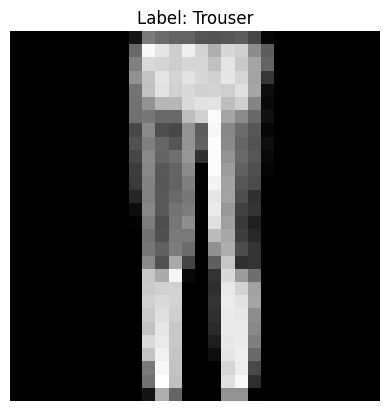

In [156]:
# Display the third image
plt.imshow(x_test[3].reshape(28, 28), cmap="gray")
plt.title(f"Label: {class_names[y_test[3]]}") 

plt.axis("off")
plt.show()


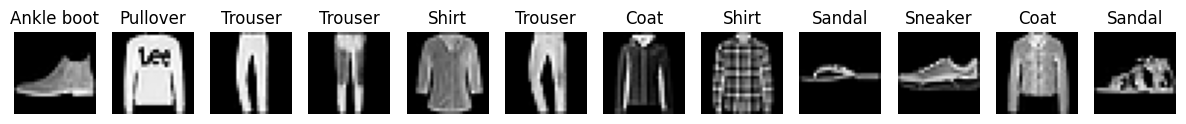

In [157]:
plt.figure(figsize=(15, 5))
for i in range(12):
    plt.subplot(1, 12, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    # plt.title(f"Label: {y_test[i]}")
    plt.title(class_names[y_test[i]]) 
    plt.axis("off")
plt.show()

### Overview

Here we see that our model has been able to predict the correct output as shown in the images above

1. We loaded the fashion_mnist dataset
2. we splited the data into a train set and test set
3. we visualized some sample data in the train train dataset
4. we created the model
5. we evaluated the model to find the loss and accuracy
6. we visualized the loss and accuracy
7. we predicted the model output on the train set
8. we visualized the model output

#### About the Author

    Name:  Kaitale Muhammad
    Email: kaitalemuhammad1@gmail.com
    Tel:   +256-780531741